In [1]:
from qiskit import QuantumCircuit

# Create a circuit with a register of three qubits
circ = QuantumCircuit(1)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
circ.measure_all()
circ.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler

service = QiskitRuntimeService()
backend = service.least_busy(simulator=True, operational=True)
print("choosen simulator : ", backend.name)
job = Sampler(backend).run(circ, shots = 500)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

choosen simulator :  simulator_extended_stabilizer
job id: cneveq6j1613i2jrdig0
SamplerResult(quasi_dists=[{1: 0.518, 0: 0.482}], metadata=[{'shots': 500, 'circuit_metadata': {}}])


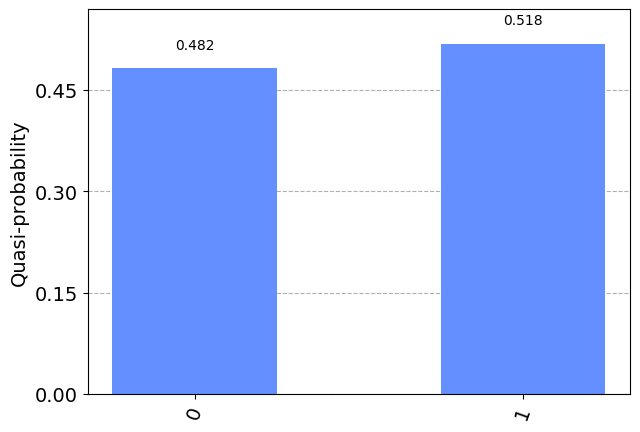

In [6]:
from qiskit.visualization import plot_histogram

statistics = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))